In [38]:
#import packages
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from bs4 import BeautifulSoup

In [2]:
with open("nasdaq100.html", encoding='utf8') as file_reader:
    soup = BeautifulSoup(file_reader, "lxml")

In [3]:
# print(soup.prettify())

In [4]:
# soup.find_all("td", attrs = {"data-x":"0"})

In [5]:
company_listings = []
for idx in range(len(soup.find_all("td", attrs = {"data-x":"8"}))):
    if soup.find_all("td", attrs = {"data-x":"8"})[idx]['data-order'] == "X":
        company_listings.append(soup.find_all("td", attrs = {"data-x":"0"})[idx]['data-order'])
print(company_listings)

['AAL', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'ALXN', 'AMAT', 'AMGN', 'AMZN', 'ATVI', 'AVGO', 'BIDU', 'BIIB', 'BMRN', 'CA', 'CELG', 'CERN', 'CHKP', 'CHTR', 'CMCSA', 'COST', 'CSCO', 'CSX', 'CTAS', 'TCOM', 'CTSH', 'CTXS', 'DISCA', 'DISCK', 'DISH', 'DLTR', 'EA', 'EBAY', 'ESRX', 'EXPE', 'FAST', 'FB', 'FISV', 'FOX (Old)', 'FOXA (Old)', 'GILD', 'GOOG', 'GOOGL', 'HAS', 'HOLX', 'HSIC', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KHC', 'KLAC', 'LBTYA', 'LBTYK', 'LILA', 'LILAK', 'LRCX', 'LVNTA', 'MAR', 'MAT', 'MCHP', 'MDLZ', 'MNST', 'MSFT', 'MU', 'MXIM', 'VTRS', 'NCLH', 'NFLX', 'NTES', 'NVDA', 'NXPI', 'ORLY', 'PAYX', 'PCAR', 'BKNG', 'PYPL', 'QCOM', 'QRTEA', 'REGN', 'ROST', 'SBAC', 'SBUX', 'SHPG', 'SIRI', 'STX', 'SWKS', 'NLOK', 'TMUS', 'TRIP', 'TSCO', 'TSLA', 'TXN', 'ULTA', 'VIAB', 'VOD', 'VRSK', 'VRTX', 'WBA', 'WDC', 'XLNX', 'XRAY', 'YHOO']


In [11]:
#get a company's ticker using a key
quandl.ApiConfig.api_key = ''

#Get list of tickers
ticker = pd.read_csv('ticker_list.csv')

In [12]:
#I suspect NASDAQ stocks wil be, on average, more sensitive to Twitter sentiment than "traditional" companies on NYSE, SP500, etc
nasdaq = ticker[ticker["Exchange"] == "NASDAQ"].reset_index(drop = True)
nasdaq100 = nasdaq[nasdaq['Ticker'].isin(company_listings)].reset_index(drop = True)

In [13]:
# list of all NASDAQ 100 stocks (EOY 2016) in Quandl's NASDAQ database
# list(nasdaq100['Ticker'])

# list of companies in NASDAQ 100 (EOY 2016) not in Quandl's NASDAQ database
# set(list(nasdaq100['Ticker'])) ^ set(company_listings)


In [14]:
#graphs of all NASDAQ 100 companies
#for code in nasdaq100["Quandl_Code"]:
#    company = quandl.get(code, start_date='2016-12-31', end_date='2020-12-31')
#    plt.plot(company["Open"])
#    plt.title(nasdaq100[nasdaq100["Quandl_Code"] == code].reset_index(drop = True)["Name"][0])
#    plt.show()

In [80]:
# Directory = r"W:\My Documents\UMich\MADS\M4\SIADS 591 - Milestone"

# ListOfTwitterHandles = pd.read_csv(os.path.join(Directory, 'Twitter Analysis', 'TwitterHandles.csv'))
# ListOfTwitterHandles.Symbol.to_list()

['AAPL', 'MSFT', 'AMZN', 'TSLA', 'FB', 'GOOG', 'NVDA', 'PYPL', 'NFLX', 'INTC']

In [ ]:
Handles = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'FB', 'GOOG', 'NVDA', 'PYPL', 'NFLX', 'INTC']
Tweetlist_BSI_df = pd.DataFrame()
for i, Handle in enumerate(Handles):
    tweets = search_tweets_sn(
    q = str(Handle),
    since = "2017-06-01",
    until="2017-06-01",
    lang="en",
    max_tweets=10000000
    )
    
    Tweetlist = pd.DataFrame(
        [[tweet.date, tweet.text, tweet.username, ListOfTwitterHandles.Company[i], ListOfTwitterHandles.Symbol[i], ListOfTwitterHandles.TwitterHandle1[i]] for tweet in tweets], 
        columns= ['Created','Text','User', 'Company', 'Symbol', 'TwitterHandle']
    )
    #Tweetlist_BSI_df = Tweetlist_BSI_df.append(Tweetlist)
    
    Tweetlist.to_csv(os.path.join(Directory, 
                                  'Twitter Analysis

In [70]:
Directory = r"W:\My Documents\UMich\MADS\M4\SIADS 591 - Milestone"

TSLA_Tweets = pd.read_csv(os.path.join(Directory, 'Twitter Analysis', 'CompanyTweets', 'Tweets TSLA 20170601 to 20190601.csv'))
TSLA_Tweets.head()

,Created,Text,User,Company,Symbol,TwitterHandle
0,2019-05-31,New @Tesla update will now probably have “Bee ...,CassieThonen,Tesla Inc,TSLA,@Tesla
1,2019-05-31,Thanks Elon for Tesla 3 now available for sale...,R1Nz20,Tesla Inc,TSLA,@Tesla
2,2019-05-31,Smart/advanced summon coming to early access m...,teslamodel3fan,Tesla Inc,TSLA,@Tesla
3,2019-05-31,. @elonmusk @tesla will there ever be a Tesla ...,pit5000,Tesla Inc,TSLA,@Tesla
4,2019-05-31,Meet future Model 3 owner @Miguel_Amaya81. Mig...,TesLatino,Tesla Inc,TSLA,@Tesla


In [71]:
print(f"Number of Tweets: {len(TSLA_Tweets):,} between {min(TSLA_Tweets.Created)} and {max(TSLA_Tweets.Created)}")

Number of Tweets: 188,331 between 2017-06-01 and 2019-05-31


In [72]:
TweetsPerDay = TSLA_Tweets.pivot_table(index='Created', values='Text', aggfunc='count')
TweetsPerDay.reset_index(inplace=True)
TweetsPerDay.sort_values(by='Text', ascending=False)

idx = pd.date_range("2017-06-01","2019-06-01")
TweetsPerDay.index = pd.DatetimeIndex(TweetsPerDay.Created)
TweetsPerDay = TweetsPerDay.reindex(idx, fill_value=0)

del TweetsPerDay['Created']

In [69]:
#Tesla stock price (June 2017 - June 2019)
tslaStock = quandl.get("EOD/TSLA", start_date='2017-6-1', end_date='2019-6-1')

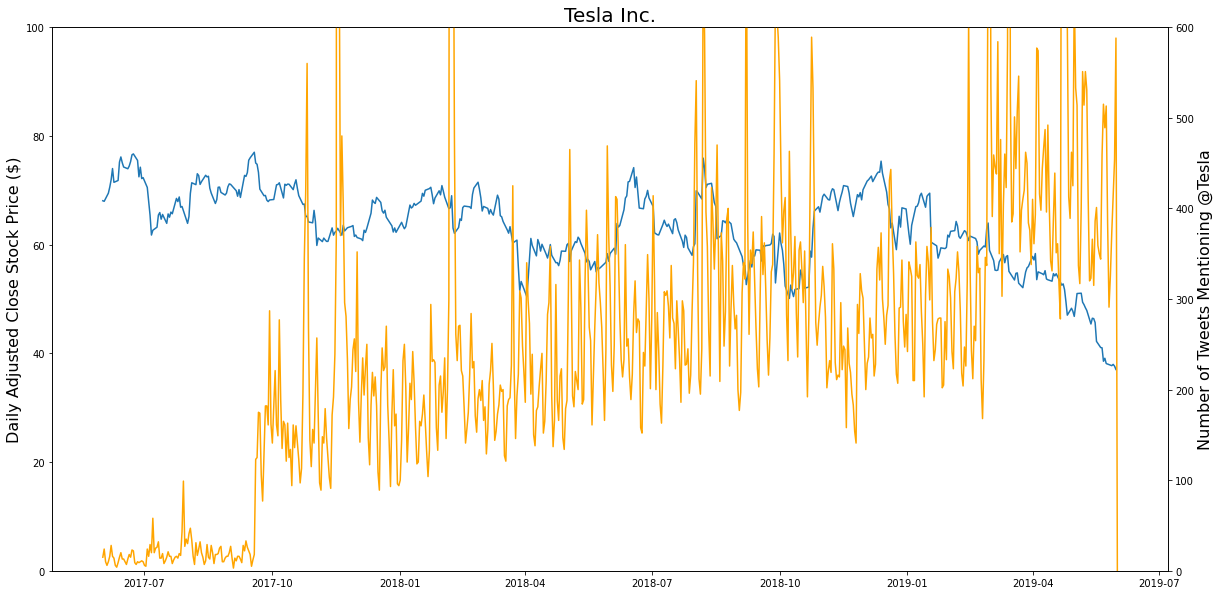

In [77]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ax1.plot(tslaStock['Adj_Close'])
ax2 = ax1.twinx()
ax2.plot(TweetsPerDay, color='orange')
ax1.set_title(nasdaq100[nasdaq100["Quandl_Code"] == "EOD/TSLA"].reset_index(drop = True)["Name"][0], size=20)
#ax1.rcParams["figure.figsize"] = (20,10)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Number of Tweets Mentioning @Tesla", size=16)
ax1.set_ylim(0,100)
ax2.set_ylim(0,600)
plt.show()